In [1]:
using PyPlot

cd("C:\\Users\\Anastasia\\Documents\\GitHub\\multidimensional-segmented-regression\\src\\constant")
include("synthetic_experiments_constant.jl")

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = import_sklearn() at Skcore.jl:120
└ @ ScikitLearn.Skcore C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:120
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at Skcore.jl:158
└ @ Core C:\Users\Anastasia\.juliapro\JuliaPro_v1.0.3.1\packages\ScikitLearn\HK6Vs\src\Skcore.jl:158


run_experiments (generic function with 1 method)

In [2]:
#Set parameters
num_trials = 2
sigma = 1.0
k=16                             # true number of pieces/rectangles of function
n_vals=[k*10, k*100,k*200]   #  number of samples
d = 10                             # dimension of samples
z = 2                             # the number of dimensions the piecewise functions are defined in

mses_mean, mses_std, times_mean, times_std, pieces_mean, pieces_std = run_experiments(num_trials, sigma, k, n_vals, d, z)
println()

In [3]:
algo_colors = Dict([("merging_k", "blue"), ("merging_kover2", "green"), ("merging_kover4", "red"), ("merging_kover8", "olive"),("true fit", "darkorchid"),("CART fit", "gray")])

Dict{String,String} with 6 entries:
  "merging_kover8" => "olive"
  "true fit"       => "darkorchid"
  "CART fit"       => "gray"
  "merging_kover4" => "red"
  "merging_k"      => "blue"
  "merging_kover2" => "green"

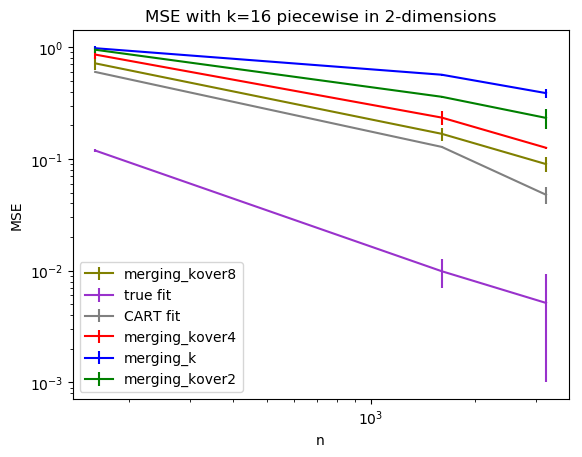

PyObject Text(24.000000000000007, 0.5, 'MSE')

In [4]:
for (algo_name, algo_mses) in mses_mean
    errorbar(n_vals, algo_mses, yerr=mses_std[algo_name], label=algo_name, color=algo_colors[algo_name])
end
#plot(n_vals, 200.0 ./ n_vals, label="C/n")
#plot(n_vals, 5.0 ./ sqrt(n_vals), label="C/sqrt(n)", color="olive")
legend()
title("MSE with k=16 piecewise in 2-dimensions")
yscale("log")
xscale("log")
xlabel("n")
ylabel("MSE")

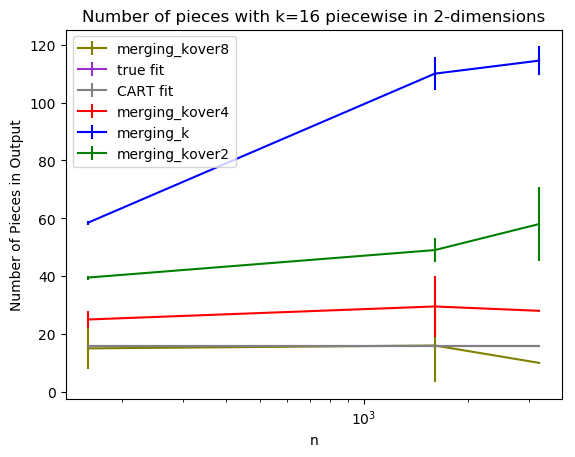

PyObject Text(24.000000000000007, 0.5, 'Number of Pieces in Output')

In [5]:
for (algo_name, algo_pieces) in pieces_mean
    errorbar(n_vals, algo_pieces, yerr=pieces_std[algo_name], label=algo_name, color=algo_colors[algo_name])
end
#plot(n_vals, 200.0 ./ n_vals, label="C/n")
#plot(n_vals, 5.0 ./ sqrt(n_vals), label="C/sqrt(n)", color="olive")
legend()
title("Number of pieces with k=16 piecewise in 2-dimensions")
yscale("linear")
xscale("log")
xlabel("n")
ylabel("Number of Pieces in Output")

Dict{AbstractString,Array{Float64,1}}("merging_kover8"=>

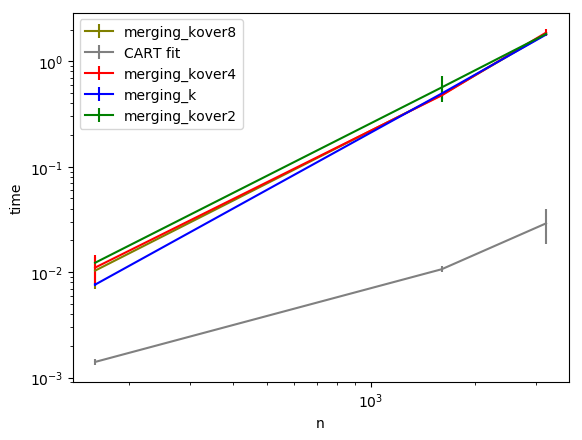

[0.0103548, 0.480995, 1.81861],"CART fit"=>[0.0014097, 0.0106708, 0.0290405],"merging_kover4"=>[0.011058, 0.474996, 1.87057],"merging_k"=>[0.00762733, 0.494648, 1.78938],"merging_kover2"=>[0.0122931, 0.565274, 1.81504])


In [6]:
for (algo_name, algo_times) in times_mean
    errorbar(n_vals, algo_times, yerr=times_std[algo_name], label=algo_name, color=algo_colors[algo_name])
end
legend()
yscale("log")
xscale("log")
xlabel("n")
ylabel("time")

println(times_mean)


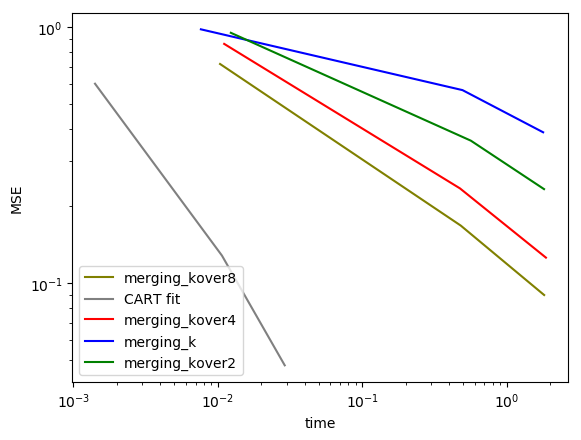

PyObject Text(24.000000000000007, 0.5, 'MSE')

In [7]:
for (algo_name, algo_times) in times_mean
    plot(algo_times, mses_mean[algo_name], label=algo_name, color=algo_colors[algo_name])
end
legend()
yscale("log")
xscale("log")
xlabel("time")
ylabel("MSE")